# PyTorch로 컨볼루션 신경망을 사용한 이미지 분류

### "Deep Learning with Pytorch: Zero to GANs"의 5번째 파트

이 튜토리얼은 [PyTorch](https://pytorch.org)를 이용한 초보자용 딥러닝 학습 튜토리얼 입니다.   
학습하기 위한 최고의 방법은 본인이 코드를 실행하고, 실험해 보는 것이기 때문에 이 튜토리얼은 실용성과 코딩 중심으로 진행됩니다.


이번 튜토리얼에선 다음과 같은 주제를 다룹니다:

- 웹 URL로부터 __이미지 데이터셋 다운__ 받기
- Convolution과 pooling 레이어에 대한 이해
- PyTorch를 통해 Convolution neural network(CNN) 생성
- CNN을 바닥부터 학습하고 성능 확인하기
- 과소적합(Underfitting)과 과대적합(overfitting)을 이겨내는 방법에 대한 이해

### 코드를 실행하는 방법

이 튜토리얼은 [주피터 노트북](https://jupyter.org)에서 실행되도록 만들어졌습니다. 여러분들은 _온라인 무료 실행 사이트_ (권장) 또는 _여러분 로컬 컴퓨터_ 에서 이 튜토리얼을 _실행_ 해 볼 수 있습니다!

#### 방법 1: 온라인 무료 실행 사이트

이 튜토리얼을 실행하는데 가장 간단한 방법은 **Colab**이라는 사이트에서 **실행**해 보는 것입니다. [Google Colab](https://colab.research.google.com)은 구글에서 제공하는 주피터 노트북을 실행 할 수 있는 무료 온라인 플랫폼입니다. 또한 **Colab**에서 실행을 하는데 문제가 생길 경우 대안책으로 **Kaggle**이나 **Binder**에서 실행할 수 있습니다.

#### 방법 2: 로컬 컴퓨터

여러분의 로컬 컴퓨터에서 실행하기 위해서, 여러분은 [Python](https://www.python.org)과 주피터 노트북 그리고 필요한 라이브러리들을 설치해야만 합니다. 이 경우 Python의 [Conda](https://docs.conda.io/projects/conda/en/latest/user-guide/install/) 배포판을 사용하는 것을 권장합니다. 주피터 노트북으로 이 튜토리얼을 열으셨을 경우 페이지 상단의 **Run** 버튼을 클릭하고 **Run Locally** 옵션을 선택하고 다음 안내를 따릅니다.

>  **주피터 노트북**: 이 튜토리얼은 [주피터 노트북](https://jupyter.org)의 __셀__ 로 만들어졌습니다. 각 셀에는 Python으로 작성된 코드 또는 일반 한글로 된 설명이 존재할 수 있습니다. 여러분은 코드 셀을 실행하고 결과(ex. 숫자들, 메세지, 그래프, 표, 파일, 기타 등등)를 즉시 볼 수 있습니다. 주피터는 실험과 분석을 하는데 강력한 플랫폼입니다. 코드에 여러분의 생각을 펼치는것을 두려워하지 마세요! - 여러분은 에러들을 고치며 많은 것을 배울 수 있습니다. 여러분은 메뉴에 있는 "Kernel -> Restart & Clear Output"이나 "Edit -> Clear Outputs"을 사용해 모든 결과를 지우고, 처음부터 다시 시작 할 수 있습니다.

### 빠른 학습을 위한 GPU 사용

여러분은 만약 여러분의 실행 플랫폼이 NVIDIA에서 만든 GPU와 연결 되어있다면,  [Graphics Processing Unit](https://en.wikipedia.org/wiki/Graphics_processing_unit) (GPU)를 여러분의 모델을 더 빠르게 학습시키기 위해 사용할 수 있습니다.

다음 명령어들은 GPU를 사용할 수 있는 플랫폼 목록입니다:

* _Google Colab_: Use the menu option "Runtime > Change Runtime Type" and select "GPU" from the "Hardware Accelerator" dropdown.
* _Kaggle_: In the "Settings" section of the sidebar, select "GPU" from the "Accelerator" dropdown. Use the button on the top-right to open the sidebar.
* _Binder_: Notebooks running on Binder cannot use a GPU, as the machines powering Binder aren't connected to any GPUs.
* _Linux_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-linux/index.html).
* _Windows_: If your laptop/desktop has an NVIDIA GPU (graphics card), make sure you have installed the [NVIDIA CUDA drivers](https://docs.nvidia.com/cuda/cuda-installation-guide-microsoft-windows/index.html).
* _macOS_: macOS is not compatible with NVIDIA GPUs


GPU에 액세스할 수 없거나 GPU가 무엇인지 잘 모를 경우, GPU 없이도 튜토리얼의 모든 코드를 실행할 수 있습니다.

---
## CIFAR10 Dataset

이전 튜토리얼에서 [MNIST dataset](http://yann.lecun.com/exdb/mnist)에 대해 97% 이상의 정확도를 가진 순방향 신경망(feed-forward Neural network)을 학습해 보았습니다.<br>

이번 튜토리얼에선, 저흰 __60000개의 32×32px 컬러 이미지__ 로 구성된 CIFAR10 데이터셋을 사용할 것입니다.<br>
아래 그림은 CIFAR 10 데이터셋의 샘플 이미지들 입니다:

<img src="https://miro.medium.com/max/709/1*LyV7_xga4jUHdx4_jHk1PQ.png" style="max-width:480px">


In [2]:
# Uncomment and run the appropriate command for your operating system, if required

# Linux / Binder / Windows (No GPU)
# !pip install numpy matplotlib torch==1.7.0+cpu torchvision==0.8.1+cpu torchaudio==0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

# Linux / Windows (GPU)
# pip install torch==1.7.1+cu110 torchvision==0.8.2+cu110 torchaudio==0.7.2 -f https://download.pytorch.org/whl/torch_stable.html
 
# MacOS (NO GPU)
# !pip install numpy matplotlib torch torchvision torchaudio

In [54]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [4]:
project_name='05-cifar10-cnn'

`torchvision`과 `tarfile` 패키지로부터 몇 가지 함수를 사용해 [이 페이지](https://course.fast.ai/datasets)로부터 PNG 포맷의 이미지를 다운로드 받을 것입니다.

In [5]:
# Dowload the dataset
dataset_url = "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url, '.')

In [6]:
# Extract from archive
with tarfile.open('./cifar10.tgz', 'r:gz') as tar:
    tar.extractall(path='./data')

데이터셋은 `data/cifar10` 디렉토리에 있고, 이 디렉토리 내부에는 `train`과 `test` 두 폴더가 있습니다.<br>
학습 세트는 50000개의 이미지가 있고, 테스트 세트에는 10000개의 이미지가 각각 있습니다.<br>
각각은 __이미지 클래스 10개의 폴더__ 로 구성됩니다.<br>
`os.listdir`을 사용해 확인해 보겠습니다.

In [7]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + "/train")
print(classes)

['test', 'train']
['horse', 'airplane', 'automobile', 'cat', 'frog', 'dog', 'ship', 'deer', 'bird', 'truck']


Let's look inside a couple of folders, one from the training set and another from the test set. As an exercise, you can verify that that there are an equal number of images for each class, 5000 in the training set and 1000 in the test set.



In [8]:
airplane_files = os.listdir(data_dir + "/train/airplane")
print('No. of training examples for airplanes:', len(airplane_files))
print(airplane_files[:5])

No. of training examples for airplanes: 5000
['1339.png', '1451.png', '4014.png', '4928.png', '3552.png']


In [9]:
ship_test_files = os.listdir(data_dir + "/test/ship")
print("No. of test examples for ship:", len(ship_test_files))
print(ship_test_files[:5])

No. of test examples for ship: 1000
['0823.png', '0630.png', '0109.png', '0424.png', '0836.png']


상위 디렉토리 구조는 computer 비전 데이터셋에서 자주 사용되는 구조입니다.<br>
그리고 대부분의 딥러닝 라이브러리는 이러한 데이터 세트 구조로 작업하기 위한 유틸리티를 제공합니다.<br>
`torchvision`의 `ImageFolder`를 사용해 PyTorch 텐서로 데이터를 로드할 수 있습니다.

In [10]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [11]:
dataset = ImageFolder(data_dir+'/train', transform=ToTensor())

학습 데이터셋의 샘플 요소를 보도록 하겠습니다.<br>
각 요소는 튜플로, 이미지 텐서와 레이블로 구성됩니다.<br>
데이터는 32×32 px, 3 채널로(RGB)구성되며, 각 이미지 텐서의 형태(shape)는 `(3, 32, 32)`.

In [12]:
img, label = dataset[0]
print(img.shape, label)
img

torch.Size([3, 32, 32]) 0


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

클래스 목록은 데이터 세트의 `.classes` 속성에 저장됩니다.<br>
각 요소의 숫자 라벨은 `.classes` 목록에 있는 요소의 라벨의 인덱스에 해당됩니다.

In [13]:
print(dataset.classes)

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


`matplotlib`을 사용해 이미지를 볼 수 있지만, `matplotlib`은 색상 채널이 제일 마지막에 있어야 하므로 `(32, 32, 3)`으로 변경해야 합니다.<br>
이제 이미지와 레이블을 표시하는 함수를 만들어 보겠습니다.

In [56]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams['figure.facecolor'] = '#ffffff'

In [14]:

def show_example(img, label):
    print('Label: ', dataset.classes[label], "("+str(label)+")")
    plt.imshow(img.permute(1, 2, 0))

데이터 세트의 몇 가지 이미지를 살펴 보겠습니다.<br>
32×32px 이미지는 사람의 눈으로도 식별하기가 매우 어렵습니다. (다른 이미지를 보려면 아래 코드의 dataset의 인덱스를 변경하면 됩니다.)

Label:  airplane (0)


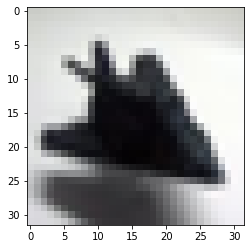

In [15]:
show_example(*dataset[0])

Label:  airplane (0)


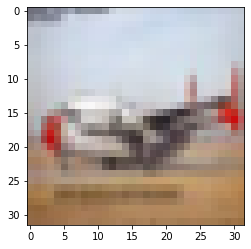

In [16]:
show_example(*dataset[1099])

## 학습 및 검증 데이터셋

실제 기계 학습 모델을 구축하는 동안 데이터 세트를 세 부분으로 분할하는 것이 매우 일반적입니다.
1. **Training set** - 모델을 훈련시키는 데 사용되는 데이터 셋. 즉, 손실 계산과 경사 하강을 사용해 모델의 가중치를 조정합니다.
2. **Validation set** - 학습 도중 모델을 평가하는데 사용되는 데이터 셋. 하이퍼 파라미터를 조정하고, 최적의 모델을 선택하게 합니다.
3. **Test set** - 다른 모델이나 접근법들과 비교하기 위해 사용되는 데이터 셋. 모델의 최종 정확도를 나타냅니다.

미리 정의된 _검증 세트_ 가 없으므로 _검증 세트_ 로 사용할 _훈련 세트_ 의 일부를(5000 개 이미지)을 따로 설정할 수 있습니다.<br>
PyTorch의 `random_split` 메서드를 사용해 10000개를 무작위로 뽑아 검증 셋으로 만들 수 있습니다.<br>
누가, 언제 실험하든 언제나 같은 검증 세트를 사용하기 위해, 난수 생성기의 시드를 지정할 것입니다.

In [1]:
random_seed = 42
torch.manual_seed(random_seed);

NameError: name 'torch' is not defined

In [22]:
val_size = 5000
train_size = len(dataset) - val_size

train_ds, val_ds = random_split(dataset, [train_size, val_size])
len(train_ds), len(val_ds)

(45000, 5000)

이제 학습과 검증을 위한 데이터 로더를 만들어 보겠습니다.

In [24]:
from torch.utils.data.dataloader import DataLoader

batch_size=128

In [25]:
train_dl = DataLoader(train_ds, batch_size, shuffle=True, num_workers=4, pin_memory=True)
val_dl = DataLoader(val_ds, batch_size*2, num_workers=4, pin_memory=True)

`torchvision`의 `make_grid` 메서드를 사용해 데이터셋의 배치의 이미지 볼 수 있습니다.<br>
샘플러가 배치를 생성하기 전에 인덱스를 섞기 때문에 매 실행마다 다른 배치를 얻게 됩니다.

In [26]:

from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=16).permute(1, 2, 0))
        break

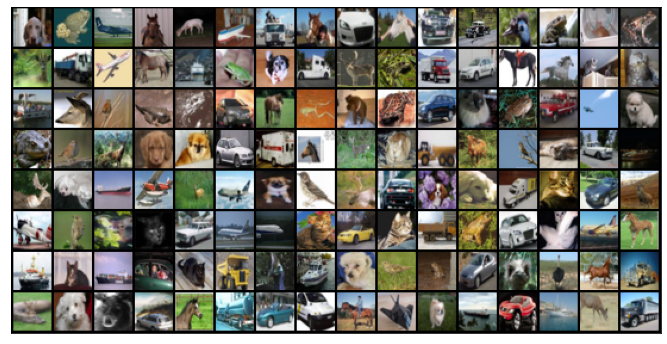

In [27]:
show_batch(train_dl)

## 모델 정의 (Convolutional Neural Network)

이전 튜토리얼에서 저희는 `nn.Linear`를 사용해 Fully connected layer(선형 레이어)들로 이루어진 심층 신경망을 정의했습니다.<br>
하지만 이번 튜토리얼에서는 PyTorch의 `nn.Conv2d` 클래스를 사용해 Convolutional neural network를 사용할 것입니다.

> 2D convolution은 매우 간단한 연산입니다: 가중치가 있는 작은 행렬인 “커널”로 2D 입력 데이터 위를“슬라이딩”하며 현재 위에 있는 부분 행렬과 요소별 곱셈을 수행 후 더해 하나의 픽셀로 결과를 냅니다.


<img src="https://miro.medium.com/max/1070/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif" style="max-width:400px;">

3×3 커널을 이용한 1채널 이미지의 convolution 연산을 구현해 보겠습니다.

In [29]:
def apply_kernel(image, kernel):
    ri, ci = image.shape       # image dimensions
    rk, ck = kernel.shape      # kernel dimensions
    ro, co = ri-rk+1, ci-ck+1  # output dimensions
    output = torch.zeros([ro, co])
    for i in range(ro): 
        for j in range(co):
            output[i,j] = torch.sum(image[i:i+rk,j:j+ck] * kernel)
    return output

In [30]:
sample_image = torch.tensor([
    [3, 3, 2, 1, 0], 
    [0, 0, 1, 3, 1], 
    [3, 1, 2, 2, 3], 
    [2, 0, 0, 2, 2], 
    [2, 0, 0, 0, 1]
], dtype=torch.float32)

sample_kernel = torch.tensor([
    [0, 1, 2], 
    [2, 2, 0], 
    [0, 1, 2]
], dtype=torch.float32)

apply_kernel(sample_image, sample_kernel)

tensor([[12., 12., 17.],
        [10., 17., 19.],
        [ 9.,  6., 14.]])

다채널 이미지에 대해 각 채널에 다른 커널이 적용되고 출력은 픽셀 단위로 함께 추가됩니다.

convolution에 대한 더 깊은 이해를 위해 다음 게시글들을 읽어보십시오:

1. [Intuitively understanding Convolutions for Deep Learning](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1) by Irhum Shafkat
2. [Convolutions in Depth](https://sgugger.github.io/convolution-in-depth.html) by Sylvian Gugger (this article implements convolutions from scratch)

이미지 데이터 처리시 convolution 레이어는 특수한 이점이 있습니다:

* **적은 파라미터**: 작은 수의 파라미터(커널)은 전체 이미지에 대한 결과를 계산합니다. <br> 이런 모델은 fully connected layer와 비교해 훨씬 적은 파라미터를 가집니다.


* **연결의 희소성**: 각 레이어에서 각 출력 요소는 적은 수의 입력 요소에만 의존하므로 순방향 및 역방향 패스가 더 효율적입니다.


* **파라미터 공유와 공간적 불변성**: 커널에 의한 피쳐 학습은 다른 이미지의 다른 부분속 비슷한 패턴을 감지할 수 있습니다.


또한 각 convolutional 레이어 뒤에 [max-pooling](https://computersciencewiki.org/index.php/Max-pooling_/_Pooling) 레이어를 사용해 output 텐서 height와 width를 점점 감소시킵니다.

<img src="https://computersciencewiki.org/images/8/8a/MaxpoolSample2.png" style="max-width:400px;">

전체 모델을 설정하기 전, max-pooling layer 연산 뒤에 오는 하나의 Convolutional 레이어가 어떻게 작동하는 지를 알아보겠습니다.

In [31]:
import torch.nn as nn
import torch.nn.functional as F

In [32]:
simple_model = nn.Sequential(
    nn.Conv2d(3, 8, kernel_size=3, stride=1, padding=1),
    nn.MaxPool2d(2, 2)
)

`kernel_size`,`stride` 및`padding`에 대한 설명은 [Sylvian's post](https://sgugger.github.io/convolution-in-depth.html)를 참고하십시오.

In [33]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = simple_model(images)
    print('out.shape:', out.shape)
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 8, 16, 16])


`Conv2d`는 3채널 이미지를 16채널 피쳐맵으로 변환시키고, `MaxPool2d` 레이어는 높이와 너비를 반으로 줄입니다.<br>
피처맵은 레이어를 추가할 수록 점점 더 작아집니다.<br>
최종적으로는 벡터 형태로 만듨구 있는 작은 피쳐맵이 생성됩니다.<br>
Fully connected layer들을 추가해 각 이미지를 마지막엔 10 사이즈의 벡터를 얻을 수 있습니다.

<img src="https://i.imgur.com/KKtPOKE.png" style="max-width:540px">

학습과 검증을 도와주는 메서드들을 가지고있는 `ImageClassificationBase` 클래스를 상속해 모델을 정의해 봅시다.

In [35]:
class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['train_loss'], result['val_loss'], result['val_acc']))
        
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

`nn.Sequential`을 사용해 레이어와 활성 함수를 하나의 네트워크 구조로 묶을 수 있습니다.

In [36]:
class Cifar10CnnModel(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 64 x 16 x 16

            nn.Conv2d(64, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(128, 128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 128 x 8 x 8

            nn.Conv2d(128, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(256, 256, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), # output: 256 x 4 x 4

            nn.Flatten(), 
            nn.Linear(256*4*4, 1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10))
        
    def forward(self, xb):
        return self.network(xb)

In [37]:
model = Cifar10CnnModel()
model

Cifar10CnnModel(
  (network): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU()
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU()
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU()
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU()
    (14): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (15): Flatten(start_dim=1, end_dim=-1)
    (16): Linear(in_features=4096, out_features=1024, bias=True)
    (17): ReLU()
    (18): Linear(in_feat

모델이 학습 데이터 배치에서 기대되는 출력을 생산하는지 확인해 보겠습니다.<br>
각 이미지를 위한 10 사이즈의 벡터의 출력은 각 요소마다 10개의 _타겟 클래스에 대한 확률_ 을 나타낸다고 볼 수 있습니다.(softmax 적용 후)<br>
입력이미지는 모델이 생성한 가장 높은 확률에 의해 _클래스(레이블)_ 이 예측됩니다.<br>
이 출력에 대한 자세한 설명은 지난 로지스틱 회귀 튜토리얼의 Softmax를 복습해 보시기 바랍니다.

In [38]:
for images, labels in train_dl:
    print('images.shape:', images.shape)
    out = model(images)
    print('out.shape:', out.shape)
    print('out[0]:', out[0])
    break

images.shape: torch.Size([128, 3, 32, 32])
out.shape: torch.Size([128, 10])
out[0]: tensor([ 0.0227,  0.0050,  0.0075, -0.0167,  0.0360, -0.0371, -0.0080, -0.0307,
        -0.0291,  0.0121], grad_fn=<SelectBackward>)


GPU를 원활히 쓰기위해, 우리의 모델과 데이터를 GPU로 옮겨주는 `get_default_device`와 `to_device` 두 개의 함수와 `DeviceDataLoader`클래스를 정의하겠습니다.

In [39]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

여러분의 노트북이 실행되고 있는 곳에 기반해 여러분의 기본 장치는 CPU(`torch.device('cpu')`) 또는 GPU(`torch.device('cuda')`)가 될 것입니다.

In [40]:
device = get_default_device()
device

device(type='cuda')

We can now wrap our training and validation data loaders using `DeviceDataLoader` for automatically transferring batches of data to the GPU (if available), and use `to_device` to move our model to the GPU (if available).

In [41]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)
to_device(model, device);

## 모델 학습

경사 하강법을 사용하여 모델을 학습시키고 검증 세트에서 성능을 평가하기 위한 `fit`와 `evaluate` 두 가지 함수를 정의합니다.

In [44]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    history = []
    optimizer = opt_func(model.parameters(), lr)
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        model.epoch_end(epoch, result)
        history.append(result)
    return history

학습하기 전, 모델을 다시 한 번 선언하고 초기 파라미터로 검증 세트에서 어떻게 수행되는지 살펴 보겠습니다.

In [45]:
model = to_device(Cifar10CnnModel(), device)

In [46]:
evaluate(model, val_dl)

{'val_acc': 0.10143611580133438, 'val_loss': 2.3031394481658936}

초기 정확도는 10% 언저리로, 랜덤 초기화된 모델의 양상을 보이고있습니다.(10개 클래스중 1개를 랜덤으로 고르는 것이므로...)

학습을 위해 아래 코드와 같은 _하이퍼 파라미터_ (학습률, epoch의 수, 배치 사이즈 등)를 사용할 것입니다.<br>

In [47]:
num_epochs = 10
opt_func = torch.optim.Adam
lr = 0.001

In [49]:
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

Epoch [0], train_loss: 1.7869, val_loss: 1.4290, val_acc: 0.4648
Epoch [1], train_loss: 1.2770, val_loss: 1.1011, val_acc: 0.6022
Epoch [2], train_loss: 1.0030, val_loss: 0.9447, val_acc: 0.6570
Epoch [3], train_loss: 0.8259, val_loss: 0.8307, val_acc: 0.7091
Epoch [4], train_loss: 0.6963, val_loss: 0.8251, val_acc: 0.7156
Epoch [5], train_loss: 0.6026, val_loss: 0.7411, val_acc: 0.7427
Epoch [6], train_loss: 0.5221, val_loss: 0.7198, val_acc: 0.7530
Epoch [7], train_loss: 0.4479, val_loss: 0.7209, val_acc: 0.7661
Epoch [8], train_loss: 0.3737, val_loss: 0.7013, val_acc: 0.7705
Epoch [9], train_loss: 0.3046, val_loss: 0.8264, val_acc: 0.7704


정확도의 그래프를 그려 모델이 어떻게 학습되는지에 대해 알아보겠습니다.

In [51]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

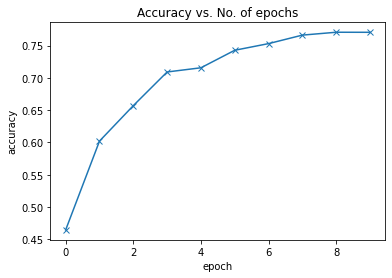

In [57]:
plot_accuracies(history)

모델은 _75% 수준_ 의 정확도에 도달했습니다.<br>
이 모델을 더 학습한다 해도 더 향상된 정확도가 나올것 같지는 않습니다.<br>
이는 이미지와 레이블 사이의 더 정확한 관계를 포착할 수 있는 좀 더 강력한 모델이 필요하다는 것을 제안합니다.<br>
좀 더 강력한 모델을 만들기 위해선 모델에 __convolutional 레이어를 추가__ 하거나, __convolutioinal 레이어의 채널을 늘리는 것__ 또는 __정규화 기법__ 을 사용해야 합니다.


학습과 검증 손실을 그래프로 그려 추세를 알아볼 수 도 있습니다.

In [58]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

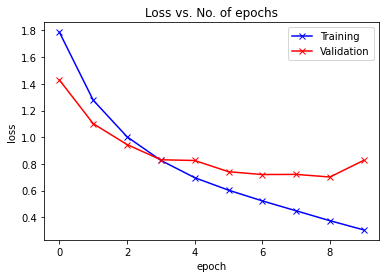

In [59]:
plot_losses(history)

처음에는 훈련 손실과 검증 손실이 모두 시간이 지남에 따라 감소하는 것 같습니다.<br>
하지만, 오랜 시간 학습을 진행하게 되면 <font color=blue>학습 손실은 계속 감소</font>하는 반면 <font color=red>검증 손실은 증가</font>하는 것을 발견할 수 있습니다.

하지만 만약 오랜 시간 모델을 학습할 경우, 학습 손실은 감소하지만, 검증 손실은 오히려 증가하는것을 확인할 수 있었습니다.

<img src="https://i.stack.imgur.com/1QU0m.png" style="max-width:400px;">

This phenomenon is called **overfitting**, and it is the no. 1 why many machine learning models give rather terrible results on real-world data. It happens because the model, in an attempt to minimize the loss, starts to learn patters are are unique to the training data, sometimes even memorizing specific training examples. Because of this, the model does not generalize well to previously unseen data.

과적합을 피하는 전략들로 다음과 같은 것들이 있습니다:

- 더 많은 학습 데이터를 생성하고 모으거나 _노이즈를 더하기_
- _배치 정규화, 드롭 아웃_ 등의정규화 기법을 사용하기
- 검증 손실 증가시 학습 _조기 종료_ 하기

다음 튜토리얼에서는 이러한 주제들을 좀 더 디테일하게 다뤄볼 것입니다.<br>
작지만 엄청난 모델의 변화로 __90%__ 이상의 정확도에 도달하는 방법또한 배울 것입니다.

## 단일 이미지 테스트

지금까지 모델의 전체적인 정확도를 주로 보았지만, _일부 샘플 이미지_ 에서의 모델의 결과를 살펴보는 것도 좋습니다. <br>
사전 정의된 테스트 데이터 세트인 10000개의 영상으로 모델을 테스트해 보겠습니다.<br>
먼저`ImageFolder` 클래스를 사용하여 테스트 데이터 세트를 만듭니다.

In [61]:
test_dataset = ImageFolder(data_dir+'/test', transform=ToTensor())

단일 이미지 텐서에 대한 예측 레이블을 반환하는 `predict_image`를 구현해보겠습니다.

In [62]:
def predict_image(img, model):
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label
    return dataset.classes[preds[0].item()]

Label: airplane , Predicted: airplane


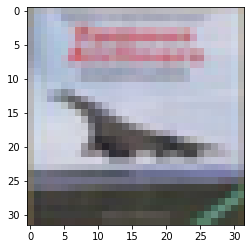

In [63]:
img, label = test_dataset[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: automobile , Predicted: truck


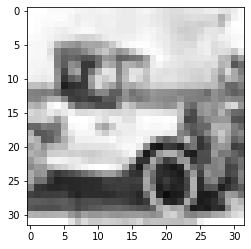

In [64]:
img, label = test_dataset[1002]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

Label: frog , Predicted: frog


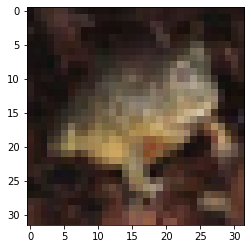

In [65]:
img, label = test_dataset[6153]
plt.imshow(img.permute(1, 2, 0))
print('Label:', dataset.classes[label], ', Predicted:', predict_image(img, model))

In [66]:
test_loader = DeviceDataLoader(DataLoader(test_dataset, batch_size*2), device)
result = evaluate(model, test_loader)
result

{'val_acc': 0.774707019329071, 'val_loss': 0.7942700386047363}

## 모델 저장 및 불러오기

오랜 시간 모델을 학습하여 이상적인 정확도를 달성하였습니다.
이 모델의 가중치와 편향 행렬을 저장하면 나중에 모델이 필요할때 모델을 처음부터 재학습 하지 않고 기존에 학습한 모델을 불러와 재사용 할 수 있으므로 좋습니다.
모델을 저장 할 수 있는 방법은 아래 코드와 같습니다.

In [68]:
torch.save(model.state_dict(), 'cifar10-cnn.pth')

`.state_dict` 메서드는 모델의 모든 가중치와 편향 행렬이 포함된 `OrderedDict`를 반환합니다.<br>
모델의 가중치를 불러오기 위해, 모델을 __같은 구조로 재정의__ 하고 `.load_state_dict`메서드를 사용할 수 있습니다.

In [69]:
model2 = to_device(Cifar10CnnModel(), device)

In [ ]:
model2.load_state_dict(torch.load('cifar10-cnn.pth'))

Just as a sanity check, let's verify that this model has the same loss and accuracy on the test set as before.

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 0.9666368365287781, 'val_acc': 0.761523425579071}

## 요약 및 더 읽을거리

이번 튜토리얼에서 다룬 주제들의 목록입니다:
* 이미지 분류를 위한 CIFAR10 데이터셋의 소개
* `torchvision`을 이용한 이미지 데이터 셋 다운로드, 추출, 로드
* `torchvision.utils.make_grid`를 이용한 이미지의 랜덤 배치 보여주기
* `nn.Conv2d`와 `nn.MaxPool2d` 레이어를 사용해 Convolution 신경망 만들기
* Convolution 신경망을 학습하고, 손실과 에러를 시각화 하기
* 과적합에 대한 이해와 피하는 전략 법 (이후에 더 다룹니다)
* 테스트 세트의 이미지 1개에 대한 예측 생성하기

이 튜토리얼에는 아직 하지 않은 많은 실험들이 있습니다.
따라서 주피터의 상호작용 특성을 활용하여 다양한 매개 변수를 활용할 것을 권장합니다. 다음은 몇 가지 아이디어입니다:

* 더 많은 Convolutional 레이어로 시도하거나 각 Convolution 레이어의 채널의 수를 증가 시켜보기
* feed forward 신경망을 사용하고, 달성 할 수 있는 최대 정확도 알아보기
* 과적합을 줄이고 더 나은 결과를 얻기 위해 위에서 언급한 몇 가지 전략을 읽고 PyTorch 문서를 살펴보고 구현해 보기
* 이 노트북을 다른 데이터셋을 학습하도록 수정하기

다음 튜토리얼에서는 데이터 어그멘테이션, 배치 정규화 및 드롭 아웃과 같은 기술을 사용하여 모델의 정확도를 계속 개선 할 것입니다. <br>
또한 모델의 성능을 크게 향상시킬 모델 아키텍처에 대한 작지만 중요한 변형인 residual network에 대해서도 알아 봅니다. <br>
계속 정진합시다!